In [56]:
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
# %matplotlib inline


In [57]:
wine = pd.read_excel('test.xlsx',header=0)
wine.head()

,star_rating,socre
0,5,0.999008
1,4,0.994503
2,5,0.002555
3,5,0.004155
4,5,0.997319


In [58]:
# 无量纲化
def dimensionlessProcessing(df):
    newDataFrame = pd.DataFrame(index=df.index)
    columns = df.columns.tolist()
    for c in columns:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        MEAN = d.mean()
        newDataFrame[c] = ((d - MEAN) / (MAX - MIN)).tolist()
    return newDataFrame

def GRA_ONE(gray, m=0):
    # 读取为df格式
    gray = dimensionlessProcessing(gray)
    # 标准化
    std = gray.iloc[:, m]  # 为标准要素
    gray.drop(str(m),axis=1,inplace=True)
    ce = gray.iloc[:, 0:]  # 为比较要素
    shape_n, shape_m = ce.shape[0], ce.shape[1]  # 计算行列

    # 与标准要素比较，相减
    a = zeros([shape_m, shape_n])
    for i in range(shape_m):
        for j in range(shape_n):
            a[i, j] = abs(ce.iloc[j, i] - std[j])

    # 取出矩阵中最大值与最小值
    c, d = amax(a), amin(a)

    # 计算值
    result = zeros([shape_m, shape_n])
    for i in range(shape_m):
        for j in range(shape_n):
            result[i, j] = (d + 0.5 * c) / (a[i, j] + 0.5 * c)

    # 求均值，得到灰色关联值,并返回
    result_list = [mean(result[i, :]) for i in range(shape_m)]
    result_list.insert(m,1)
    return pd.DataFrame(result_list)


def GRA(DataFrame):
    df = DataFrame.copy()
    list_columns = [
        str(s) for s in range(len(df.columns)) if s not in [None]
    ]
    df_local = pd.DataFrame(columns=list_columns)
    df.columns=list_columns
    for i in range(len(df.columns)):
        df_local.iloc[:, i] = GRA_ONE(df, m=i)[0]
    return df_local

In [59]:
data_wine_gra = GRA(wine)
# data_wine_gra.to_csv(path+"GRA.csv") 存储结果到硬盘
data_wine_gra

,0,1
0,1.000000,0.636054
1,0.636054,1.000000


In [60]:
data_wine_gra.columns = wine.columns
data_wine_gra.index = wine.columns
data_wine_gra

,star_rating,socre
star_rating,1.000000,0.636054
socre,0.636054,1.000000


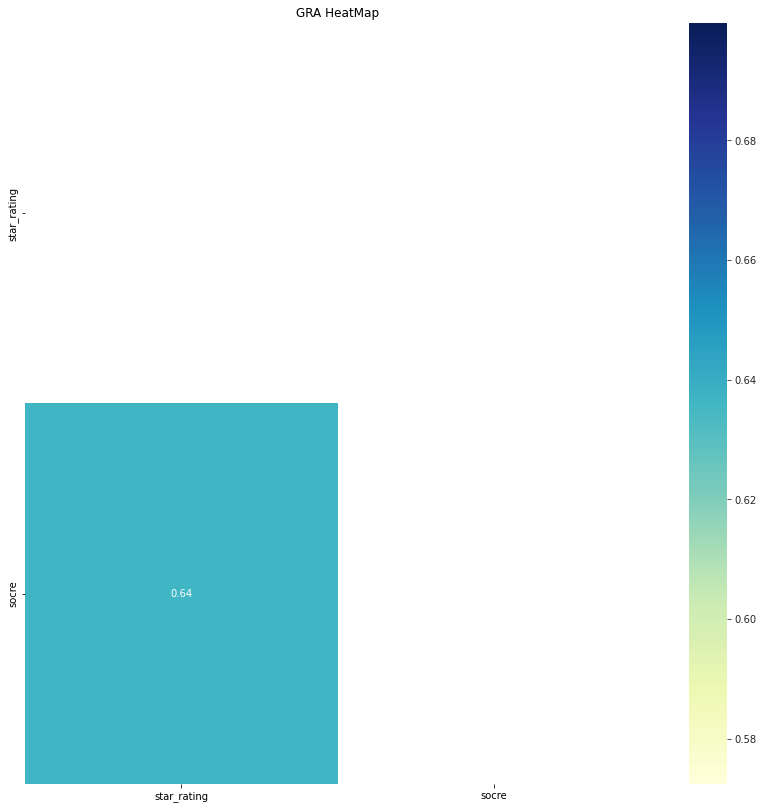

In [61]:
 # 灰色关联结果矩阵可视化
import seaborn as sns

def ShowGRAHeatMap(DataFrame):
    colormap = plt.cm.RdBu
    ylabels = DataFrame.columns.values.tolist()
    f, ax = plt.subplots(figsize=(14, 14))
    ax.set_title('GRA HeatMap')
    
    # 设置展示一半，如果不需要注释掉mask即可
    mask = np.zeros_like(DataFrame)
    mask[np.triu_indices_from(mask)] = True
    
    with sns.axes_style("white"):
        sns.heatmap(DataFrame,
                    cmap="YlGnBu",
                    annot=True,
                    mask=mask,
                   )
    plt.show()

ShowGRAHeatMap(data_wine_gra)